In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import tensorflow as tf
import glob

Data Pipeline

In [97]:
filepaths = glob.glob('datasets\Tumor\yes\*.jpg')
filepaths_negative = glob.glob('datasets\Tumor\no\*.jpeg') + glob.glob('datasets\Tumor\no\*.jpg')
filepaths_negative = tf.constant(filepaths_negative)

In [98]:
def preprocess_to_tensors(file_path):
    try:
        img = tf.io.read_file(file_path)
        img = tf.image.decode_image(img, channels=3)
        img = tf.cast(img, tf.float32) / 255.0
        img.set_shape([None, None, 3])
        img = tf.image.resize(img , [218, 180])
        return img
    except tf.errors.InvalidArgumentError:
        # Skip files that are not in a supported format
        return None

In [99]:
def preprocess_to_tensors_no(file_path):
    img = tf.io.read_file(tf.cast(file_path, tf.string))
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.cast(img, tf.float32) / 255.0
    img = tf.image.resize_with_pad(img, 360, 360)
    return img

In [100]:
imgtensorarray = tf.TensorArray(tf.float32, size = 0 , dynamic_size=True)

In [101]:
dataset = tf.data.Dataset.from_tensor_slices(filepaths)
dataset = dataset.map(preprocess_to_tensors)
for img in dataset:
    imgtensorarray = imgtensorarray.write(imgtensorarray.size(), img)

train_yes = imgtensorarray.stack()

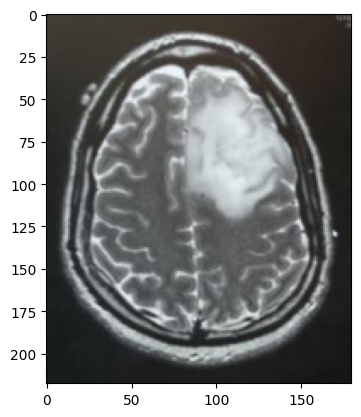

In [102]:
plt.figure()
plt.imshow(train_yes[15])

In [103]:
train_yes.shape

TensorShape([154, 218, 180, 3])

In [108]:
#dataset_negative = tf.data.Dataset.from_tensor_slices(filepaths_negative)
#dataset_negative = dataset_negative.map(lambda x: preprocess_to_tensors_no(x.decode()), num_parallel_calls=tf.data.AUTOTUNE)

In [109]:
#img_negative_tensorarray = tf.TensorArray(tf.float32, size = 0 , dynamic_size=True)
#for neg_img in dataset_negative:
#    img_negative_tensorarray = img_negative_tensorarray.write(img_negative_tensorarray.size(), neg_img)


#train_no = img_negative_tensorarray.stack()

In [110]:
#train_no.shape